# Spotify API Calls

In [1]:
import pandas as pd
import numpy as np
import json
import os
from pandas.io.json import json_normalize
import re
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import itertools

In [4]:
os.sys.path.append(os.path.dirname(os.path.abspath('.')))

In [5]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [6]:
cl_id = '66dded11300a4c5a9d565000fa13d8c8'
cl_sec = '1b74966ace0a4560bd7164f323a1afa6'
username = 'antonstorozhilov'
redirect_uri = 'http://localhost'
scope = 'user-read-currently-playing user-read-recently-played user-library-read playlist-modify-public playlist-read-private'
token = util.prompt_for_user_token(username, scope, client_id=cl_id, client_secret=cl_sec, redirect_uri=redirect_uri)
                                   #redirect_uri=redirect_uri)
    

In [7]:
spotify = spotipy.Spotify(auth=token)

### Load and clean datasets

In [116]:
with open('fifty_played_export.json', 'r') as f:
    recent_50_played = json_normalize(json.loads(f.read()))[['track.id', 'played_at', 'track.name', 'track.artists', 'track.album.name', 'track.album.id', 'track.album.images']]

In [8]:
recent_50_played['track.artists.names'] = recent_50_played['track.artists'].apply(lambda x: list(map(lambda y: y['name'], x)))

In [9]:
recent_50_played['track.artists.id'] = recent_50_played['track.artists'].apply(lambda x: list(map(lambda y: y['id'], x)))

In [10]:
recent_50_played=recent_50_played.drop(['track.artists'], axis=1)

In [11]:
recent_50_played

,track.id,played_at,track.name,track.album.name,track.album.id,track.album.images,track.artists.names,track.artists.id
0,1r1Y2hq7wMKe0CRYRkdWFw,2020-01-11T18:16:54.026Z,Side Effects,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",[Future],[1RyvyyTE3xzB2ZywiAwp0i]
1,4EpDZxSApKaod3PVqT5ben,2020-01-11T18:14:15.560Z,"Blood, Sweat, Tears",Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",[Future],[1RyvyyTE3xzB2ZywiAwp0i]
2,2XjcBGdV3h5NJ1hq5NFCy0,2020-01-11T18:07:28.658Z,Special,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[Future, Young Scooter]","[1RyvyyTE3xzB2ZywiAwp0i, 4cmA2QDPdzh8W2ytpyUGes]"
3,73pbvYLtPlT6frmLHAmPV8,2020-01-11T18:02:29.558Z,Covered N Money,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",[Future],[1RyvyyTE3xzB2ZywiAwp0i]
4,4PjP1pyA9pDDByAheDumTH,2020-01-11T17:58:54.403Z,I Be U,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",[Future],[1RyvyyTE3xzB2ZywiAwp0i]
5,11eVz92Nm7b2CTgA8OJVwp,2020-01-11T17:55:01.581Z,Never Satisfied,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[Future, Drake]","[1RyvyyTE3xzB2ZywiAwp0i, 3TVXtAsR1Inumwj472S9r4]"
6,2T4JE91t7Js1DJ4rSHltcQ,2020-01-11T17:53:06.065Z,I Won,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[Future, Kanye West]","[1RyvyyTE3xzB2ZywiAwp0i, 5K4W6rqBFWDnAN6FQUkS6x]"
7,5ik5nMy8vdS2rXe7SAGt2K,2020-01-11T17:49:06.458Z,Honest,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",[Future],[1RyvyyTE3xzB2ZywiAwp0i]
8,0ZZWXHDXn6zWDsnz6KSfGQ,2020-01-11T17:45:45.919Z,My Momma,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[Future, Wiz Khalifa]","[1RyvyyTE3xzB2ZywiAwp0i, 137W8MRPWKqSmrBGDBFSop]"
9,7GEidxhfGNteiW9n0kLyxH,2020-01-11T17:42:05.284Z,Move That Dope,Honest,5rbqupVSYwvEmXBUnFtUf7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[Future, Pharrell Williams, Pusha T, Casino]","[1RyvyyTE3xzB2ZywiAwp0i, 2RdwBSPQiwcmiDo9kixcl..."


### Process features

In [11]:
song_features = pd.DataFrame()

In [13]:
for i, v in recent_50_played.iterrows():
    audio_feat = spotify.audio_features(v['track.id'])[0]
    audio_feat['track_id'] = v['track.id']
    audio_feat['track_name'] = v['track.name']
    audio_feat['track_artists'] = v['track.artists.names'] 
    
    genres_list = list()
    for i in v['track.artists.id']:
        genres_list.append(spotify.artist(i)['genres'])
    audio_feat['track_genres'] = genres_list
    
    song_features = song_features.append(audio_feat, ignore_index=True)

In [14]:
song_features = song_features.drop(['analysis_url', 'track_href', 'uri', 'id', 'type', 'duration_ms'], axis=1)

In [15]:
song_features= song_features.set_index('track_id')

In [16]:
song_features

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_artists,track_genres,track_name,valence
track_id,,,,,,,,,,,,,,,
1r1Y2hq7wMKe0CRYRkdWFw,0.21300,0.644,0.7480,0.000000,8.0,0.4350,-4.993,1.0,0.0595,130.004,4.0,[Future],"[[atl hip hop, hip hop, pop rap, rap, southern...",Side Effects,0.7590
4EpDZxSApKaod3PVqT5ben,0.61700,0.633,0.8670,0.000000,7.0,0.4080,-4.995,1.0,0.2140,112.985,4.0,[Future],"[[atl hip hop, hip hop, pop rap, rap, southern...","Blood, Sweat, Tears",0.4040
2XjcBGdV3h5NJ1hq5NFCy0,0.02370,0.785,0.5660,0.000000,4.0,0.1190,-4.371,0.0,0.0886,135.121,4.0,"[Future, Young Scooter]","[[atl hip hop, hip hop, pop rap, rap, southern...",Special,0.0995
73pbvYLtPlT6frmLHAmPV8,0.02930,0.790,0.7230,0.000000,2.0,0.1370,-3.785,1.0,0.0455,125.118,4.0,[Future],"[[atl hip hop, hip hop, pop rap, rap, southern...",Covered N Money,0.1910
4PjP1pyA9pDDByAheDumTH,0.17100,0.580,0.5860,0.000000,4.0,0.1370,-7.968,1.0,0.0791,150.015,4.0,[Future],"[[atl hip hop, hip hop, pop rap, rap, southern...",I Be U,0.4680
11eVz92Nm7b2CTgA8OJVwp,0.50100,0.616,0.6230,0.000008,9.0,0.2430,-7.233,1.0,0.3080,143.888,4.0,"[Future, Drake]","[[atl hip hop, hip hop, pop rap, rap, southern...",Never Satisfied,0.4580
2T4JE91t7Js1DJ4rSHltcQ,0.74300,0.606,0.6600,0.000000,9.0,0.3960,-5.788,1.0,0.2580,83.746,4.0,"[Future, Kanye West]","[[atl hip hop, hip hop, pop rap, rap, southern...",I Won,0.3170
5ik5nMy8vdS2rXe7SAGt2K,0.03260,0.719,0.4770,0.000000,6.0,0.2180,-6.439,0.0,0.1780,140.141,4.0,[Future],"[[atl hip hop, hip hop, pop rap, rap, southern...",Honest,0.2970
0ZZWXHDXn6zWDsnz6KSfGQ,0.04780,0.846,0.4910,0.000227,1.0,0.1000,-7.039,0.0,0.2240,127.007,4.0,"[Future, Wiz Khalifa]","[[atl hip hop, hip hop, pop rap, rap, southern...",My Momma,0.1880


# Grouping

Build distance function and threshold s.t. two songs with distance below threshold belong in the same playlist.

Gold records: 
1. *some* of my existing playlists.
2. Build similar song pairs and groups

### Building Gold records

In [125]:
gold_records_df = pd.DataFrame()

In [126]:
user_playlists = spotify.current_user_playlists(offset=0)

In [127]:
user_playlists.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [128]:
user_playlists['total']

94

In [129]:
playlists_ls = list()

In [130]:
for i in user_playlists['items']:
    playlists_ls.append((i['name'],i['id']))

In [131]:
user_playlists = spotify.current_user_playlists(offset=50)

In [132]:
for i in user_playlists['items']:
    playlists_ls.append((i['name'],i['id']))

In [133]:
filter_playlists_ls = ['Lean & "Mumble Rappers"', 'Downtempo, Rhythm & Blues', 
                  'Shady shit', 'Soul', 'Classic Pop Rock', 'Emo Rock', 'Rough Dance Music', 'Old School Pop Dance Music',
                 'Pop Dance Music', 'Electronica Future Garage', 'Electronica Swing', 'evening', '$.¢¢ ( New Trap )',
                 'Mellow Rap', 'True Trap', 'Fired Up Rap', "Frank's Tracks", 'Old School Pop', 'Caramel', 'Sadbois',
                 'Coding Memes for Classically Savvy Teens', 'Slow Flow', 'Hard Flow']

In [134]:
gold_playlists = list(filter(lambda x: x[0] in filter_playlists_ls, playlists_ls))

In [135]:
gold_playlists

[('Lean & "Mumble Rappers"', '5jNo6WAVnaJOCqbNVu7ALj'),
 ('Downtempo, Rhythm & Blues', '7KXYh1wp6pGJiFUBOOG6IS'),
 ('Shady shit', '5q5oLyj0sUTgfBEeFDdyPH'),
 ('Soul', '1qBueVCuDMnJrrX5GzBprP'),
 ('Classic Pop Rock', '4TBT2oW9RoXH6puCruNYI3'),
 ('Emo Rock', '5rNSNSvbF4WMnpTHvd6fyq'),
 ('Rough Dance Music', '2IqSpWcaiKeuMunIucWwwm'),
 ('Old School Pop Dance Music', '2bmIi01l27EncrUpFGayOF'),
 ('Pop Dance Music', '32OOHk4JZT94kTVPIGCvLO'),
 ('Electronica Future Garage', '27O8ZsECcfj9zYI5AgGR3b'),
 ('Electronica Swing', '5QuuZf3yTnFc1zzReKKpxf'),
 ('evening', '38CaGv6SaYzm4BtmBRHAcg'),
 ('$.¢¢ ( New Trap )', '5F8CAP4L3Qpbmb7XF4Nmzl'),
 ('Mellow Rap', '03Ul56GbmdXNqu9U00Zuge'),
 ('True Trap', '6cY1JABN8ZAF4ZdcmjQ1cY'),
 ('Fired Up Rap', '6g9YAru8WLtTrpnHQ3UK5K'),
 ("Frank's Tracks", '51qtvgmejUvumw5hcsYghY'),
 ('Old School Pop', '4j2OSozqzHWY1wm23K96SU'),
 ('Caramel', '1uHMKaESrpnHMXANlu86gg'),
 ('Sadbois', '4g74pTpCm2wRaxtHvuNZ43'),
 ('Coding Memes for Classically Savvy Teens', '2psiPhL3Yv

In [10]:
# Takes a ['track']
# returns a list of: id, name, artists, genres
def extract_track_info(track_ret):
    
    artists_name_set = set()
    artists_id_set = set()
    
    # Extracting all the artists
    for a in track_ret['artists']:
        artists_name_set.add(a['name'])
        artists_id_set.add(a['id'])
    
    # Extracting genres across artists
    genres_set = set()
    for aid in artists_id_set:
        genres = spotify.artist(aid)['genres']
        for g in genres:
            genres_set.add(g)
    
    
    return [track_ret['id'], track_ret['name'], artists_name_set, genres_set]

In [11]:
def get_songs_for_playlist(user_id, playlist_id):
    # Get tracks from playlis
    tracks_read_n = 0
    
    tracks_list = list()
    while(True):
        tracks_ret = spotify.user_playlist_tracks(user_id, playlist_id, offset=tracks_read_n)
        tracks_total = tracks_ret['total']
        tracks_read_n += 50
        # Get tracks from playlist
        for t in tracks_ret['items']:
            track_info = extract_track_info(t['track'])
            # Populate song with attributes     
            audio_feat = spotify.audio_features(track_info[0])[0]        
            tracks_list.append( track_info + list(audio_feat.values()))
            
            
        if tracks_read_n > tracks_total:
            break
    return tracks_list

## Loading playlists as DFs

In [163]:
lean_mumble_raps_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '5jNo6WAVnaJOCqbNVu7ALj'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
lean_mumble_raps_playlist_df['playlist']= 'Lean & "Mumble Rappers"'

In [164]:
pop_dance_music_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '32OOHk4JZT94kTVPIGCvLO'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
pop_dance_music_playlist_df['playlist']= 'Pop Dance Music'

In [165]:
soul_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '1qBueVCuDMnJrrX5GzBprP'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
soul_playlist_df['playlist']= 'Soul'

In [166]:
caramel_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '1uHMKaESrpnHMXANlu86gg'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
caramel_playlist_df['playlist']= 'Caramel'

In [167]:
evening_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '38CaGv6SaYzm4BtmBRHAcg'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
evening_playlist_df['playlist']= 'evening'

In [168]:
frank_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '51qtvgmejUvumw5hcsYghY'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
frank_playlist_df['playlist']= "Frank's Tracks"

## Analyzing dimensions of songs 

In [169]:
import seaborn as sns

In [170]:
numerical_dimensions = ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [171]:
playlists_df = pd.concat([lean_mumble_raps_playlist_df, pop_dance_music_playlist_df, soul_playlist_df, caramel_playlist_df, evening_playlist_df, frank_playlist_df])

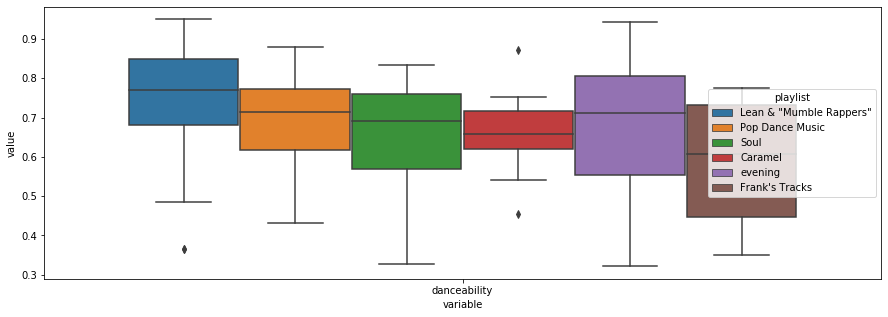

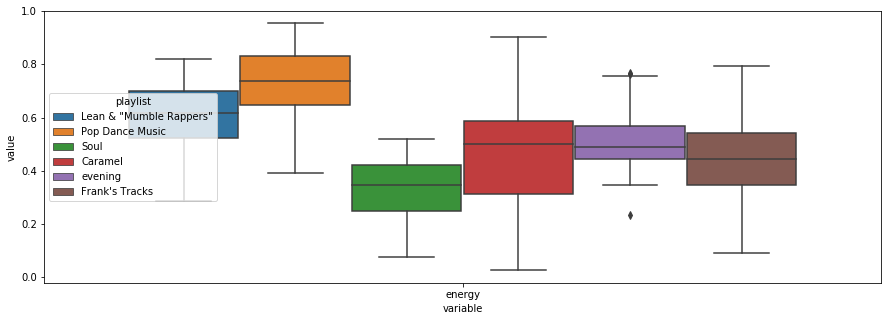

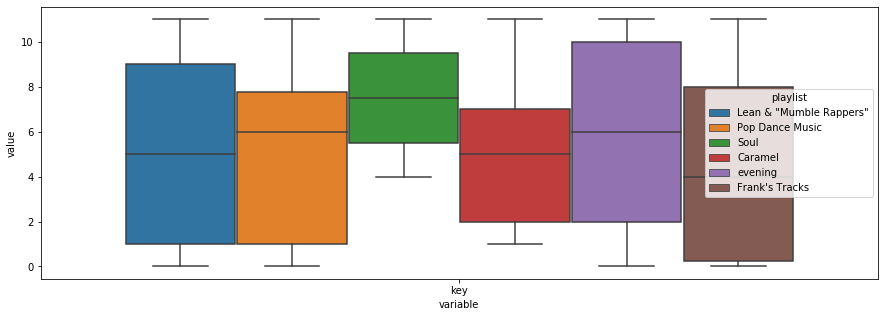

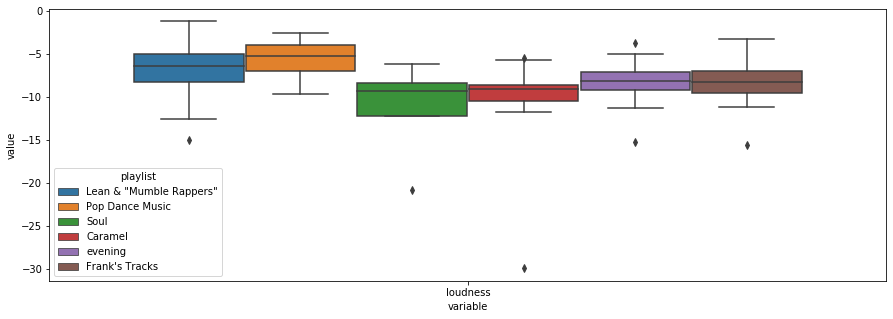

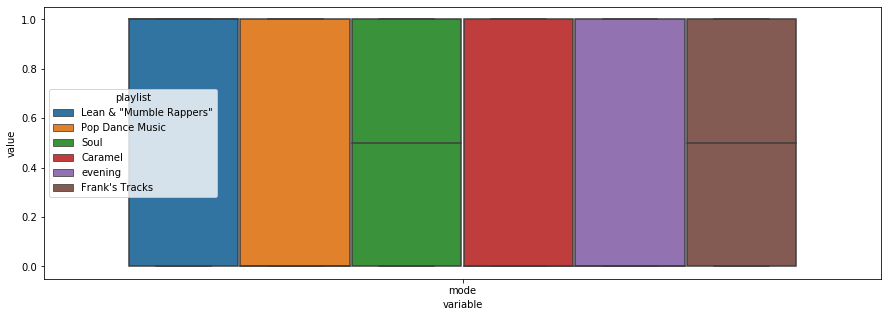

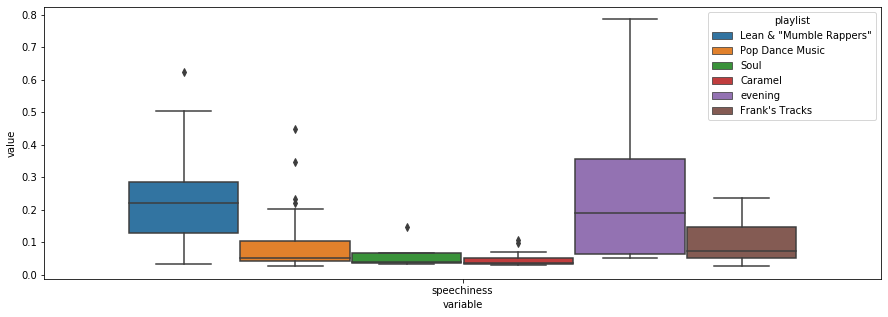

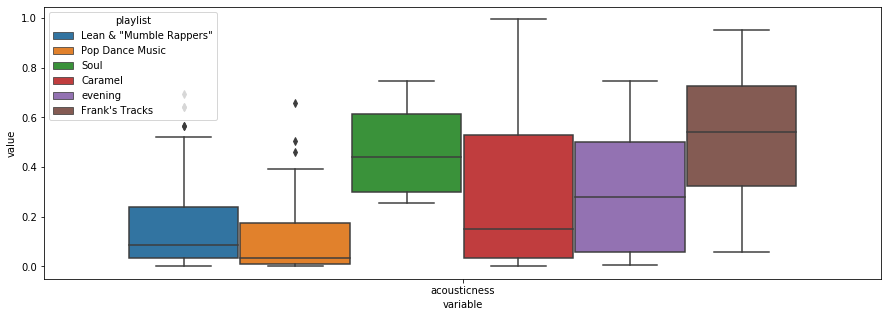

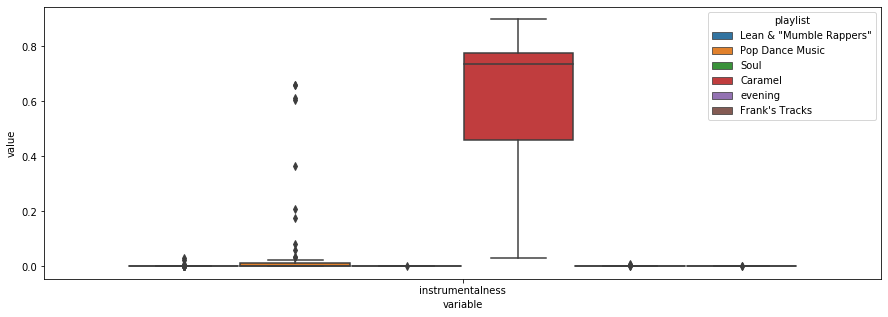

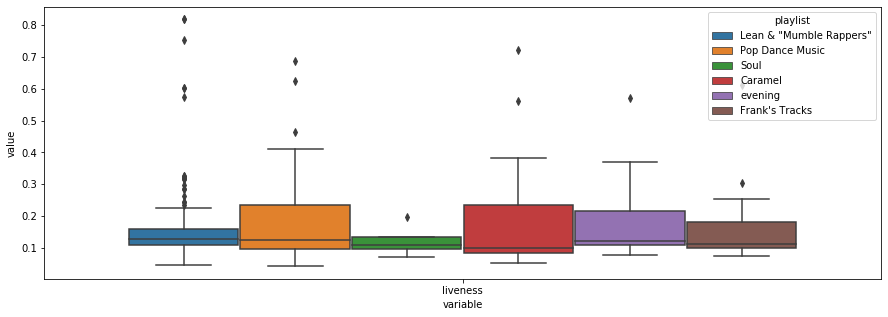

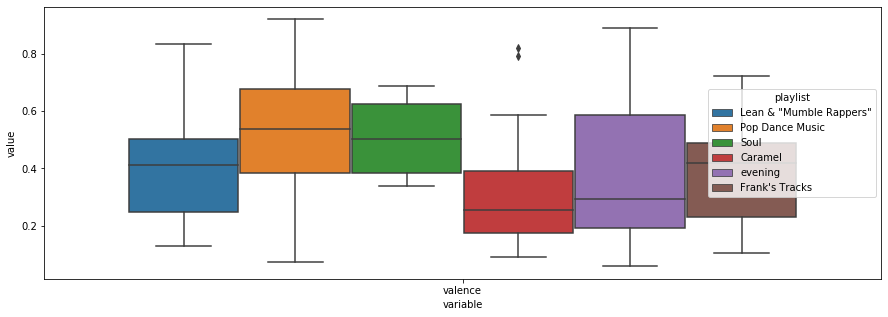

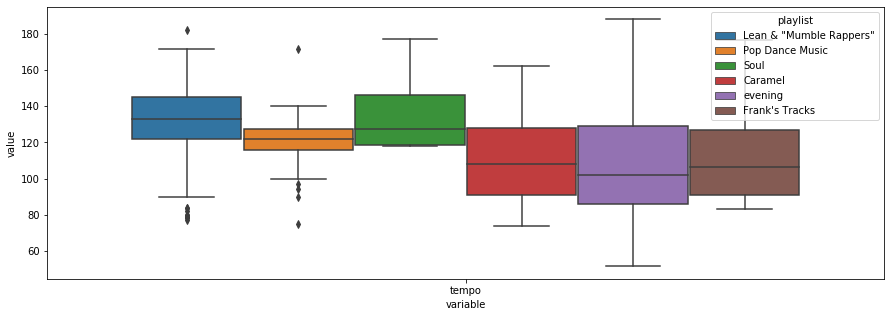

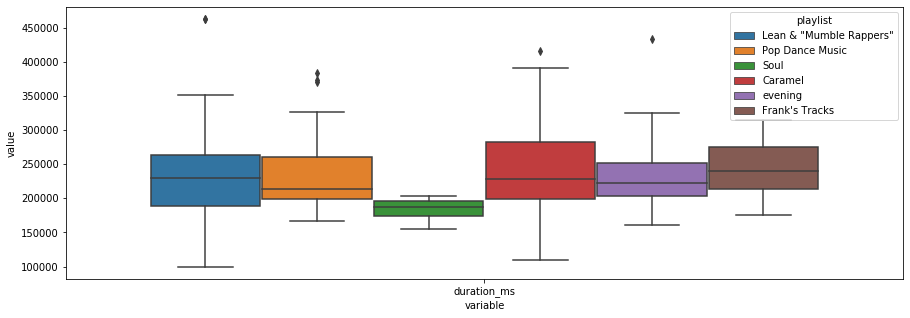

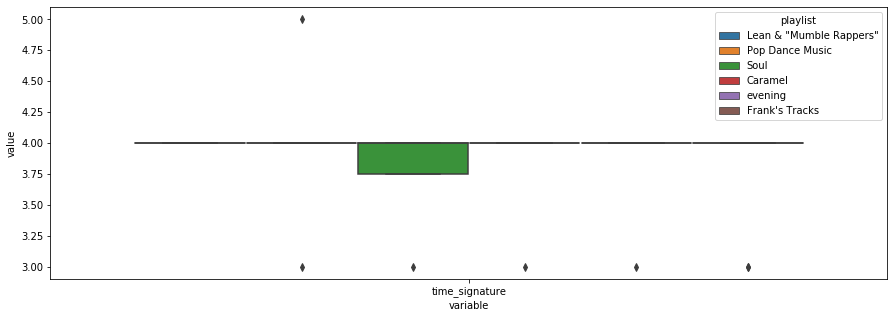

In [174]:
for dim in numerical_dimensions:
    mdf = pd.melt(playlists_df[['playlist', dim]], id_vars=['playlist'])      # MELT
    
    plt.figure(figsize=(15, 5))
    sns.boxplot(x="variable", y="value", hue="playlist", data=mdf)

In [47]:
lean_mumble_raps_playlist.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0
mean,0.762173,0.607067,5.066667,-6.740733,0.506667,0.211361,0.151380,0.000839,0.172147,0.414973,129.909320,229355.720000,4.0
std,0.124752,0.125046,3.967208,2.491533,0.503322,0.124162,0.168357,0.004431,0.140349,0.186808,22.890895,56273.970606,0.0
min,0.365000,0.286000,0.000000,-15.025000,0.000000,0.032000,0.000707,0.000000,0.046900,0.131000,76.997000,100009.000000,4.0
25%,0.694500,0.525500,1.000000,-8.016000,0.000000,0.118500,0.031500,0.000000,0.108000,0.256000,121.254000,188440.000000,4.0
50%,0.785000,0.620000,5.000000,-6.366000,1.000000,0.217000,0.079000,0.000000,0.124000,0.420000,132.054000,225205.000000,4.0
75%,0.858500,0.700000,9.000000,-5.069500,1.000000,0.280500,0.227500,0.000002,0.158500,0.519000,143.502000,257406.500000,4.0
max,0.950000,0.820000,11.000000,-1.218000,1.000000,0.623000,0.694000,0.030400,0.818000,0.832000,181.982000,461840.000000,4.0


### Creating test & training data

In [180]:
gold_records_df = pd.read_csv("gold_records_df.csv")

In [183]:
gold_records_df

,track_id,name,artists,genres,danceability,energy,key,loudness,mode,speechiness,...,liveness_2,valence_2,tempo_2,type_2,uri_2,track_href_2,analysis_url_2,duration_ms_2,time_signature_2,related
0,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.104,0.733,97.985,audio_features,spotify:track:3B54sVLJ402zGa6Xm4YGNe,https://api.spotify.com/v1/tracks/3B54sVLJ402z...,https://api.spotify.com/v1/audio-analysis/3B54...,233902,4,True
1,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.159,0.508,181.982,audio_features,spotify:track:2UVbBKQOdFAekPTRsnkzcf,https://api.spotify.com/v1/tracks/2UVbBKQOdFAe...,https://api.spotify.com/v1/audio-analysis/2UVb...,190288,4,True
2,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.132,0.242,124.991,audio_features,spotify:track:0wbnC9AUenxp613TYaJsGK,https://api.spotify.com/v1/tracks/0wbnC9AUenxp...,https://api.spotify.com/v1/audio-analysis/0wbn...,255379,4,True
3,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.165,0.281,150.062,audio_features,spotify:track:0VgkVdmE4gld66l8iyGjgx,https://api.spotify.com/v1/tracks/0VgkVdmE4gld...,https://api.spotify.com/v1/audio-analysis/0Vgk...,204600,4,True
4,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.104,0.741,141.967,audio_features,spotify:track:6p8NuHm8uCGnn2Dtbtf7zE,https://api.spotify.com/v1/tracks/6p8NuHm8uCGn...,https://api.spotify.com/v1/audio-analysis/6p8N...,304041,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13545,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.182,0.635,94.336,audio_features,spotify:track:7EulRO07ZgchxqKUHb8Pvc,https://api.spotify.com/v1/tracks/7EulRO07Zgch...,https://api.spotify.com/v1/audio-analysis/7Eul...,190177,4,True
13546,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.112,0.319,90.027,audio_features,spotify:track:5f9BMDIX18Mx4v6AAbMJjp,https://api.spotify.com/v1/tracks/5f9BMDIX18Mx...,https://api.spotify.com/v1/audio-analysis/5f9B...,142667,4,True
13547,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.104,0.572,116.894,audio_features,spotify:track:6NblUCwJXYkQlQ6LhcmSlQ,https://api.spotify.com/v1/tracks/6NblUCwJXYkQ...,https://api.spotify.com/v1/audio-analysis/6Nbl...,240000,4,True
13548,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.106,0.656,132.169,audio_features,spotify:track:0wY9rA9fJkuESyYm9uzVK5,https://api.spotify.com/v1/tracks/0wY9rA9fJkuE...,https://api.spotify.com/v1/audio-analysis/0wY9...,171818,4,True


In [181]:
playlist_dfs_list = list()
for playlist in gold_playlists:
    playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', playlist[1]),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
    playlist_df['playlist']= playlist[0]
    
    playlist_dfs_list.append(playlist_df)
    

SyntaxError: invalid syntax (<ipython-input-181-51d4dce542f2>, line 1)

In [182]:
gold_playlists

[('Lean & "Mumble Rappers"', '5jNo6WAVnaJOCqbNVu7ALj'),
 ('Downtempo, Rhythm & Blues', '7KXYh1wp6pGJiFUBOOG6IS'),
 ('Shady shit', '5q5oLyj0sUTgfBEeFDdyPH'),
 ('Soul', '1qBueVCuDMnJrrX5GzBprP'),
 ('Classic Pop Rock', '4TBT2oW9RoXH6puCruNYI3'),
 ('Emo Rock', '5rNSNSvbF4WMnpTHvd6fyq'),
 ('Rough Dance Music', '2IqSpWcaiKeuMunIucWwwm'),
 ('Old School Pop Dance Music', '2bmIi01l27EncrUpFGayOF'),
 ('Pop Dance Music', '32OOHk4JZT94kTVPIGCvLO'),
 ('Electronica Future Garage', '27O8ZsECcfj9zYI5AgGR3b'),
 ('Electronica Swing', '5QuuZf3yTnFc1zzReKKpxf'),
 ('evening', '38CaGv6SaYzm4BtmBRHAcg'),
 ('$.¢¢ ( New Trap )', '5F8CAP4L3Qpbmb7XF4Nmzl'),
 ('Mellow Rap', '03Ul56GbmdXNqu9U00Zuge'),
 ('True Trap', '6cY1JABN8ZAF4ZdcmjQ1cY'),
 ('Fired Up Rap', '6g9YAru8WLtTrpnHQ3UK5K'),
 ("Frank's Tracks", '51qtvgmejUvumw5hcsYghY'),
 ('Old School Pop', '4j2OSozqzHWY1wm23K96SU'),
 ('Caramel', '1uHMKaESrpnHMXANlu86gg'),
 ('Sadbois', '4g74pTpCm2wRaxtHvuNZ43'),
 ('Coding Memes for Classically Savvy Teens', '2psiPhL3Yv

In [186]:
trappy_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '5F8CAP4L3Qpbmb7XF4Nmzl'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
trappy_playlist_df['playlist']= '$.¢¢ ( New Trap )'

In [9]:
old_pop_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '38CaGv6SaYzm4BtmBRHAcg'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
old_pop_playlist_df['playlist']= 'Old School Pop'

NameError: name 'get_songs_for_playlist' is not defined

In [194]:
old_pop_playlist_df

,track_id,name,artists,genres,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist
0,59dflZ0Y3uiz73CKj1c5F9,Too Much Time (feat. Luu Breeze & Emerson Brooks),"{Luu Breeze, Emerson, SLMN}","{canadian hip hop, trap soul}",0.407,0.570,1,-8.439,1,0.4480,...,0.5870,187.998,audio_features,59dflZ0Y3uiz73CKj1c5F9,spotify:track:59dflZ0Y3uiz73CKj1c5F9,https://api.spotify.com/v1/tracks/59dflZ0Y3uiz...,https://api.spotify.com/v1/audio-analysis/59df...,215238,3,Old School Pop
1,0PXp9QxBfSKGGpWUNaws2X,Drama (feat. Drake),"{Drake, Roy Woods}","{canadian hip hop, trap soul, toronto rap, hip...",0.709,0.362,11,-9.814,1,0.0550,...,0.1130,122.043,audio_features,0PXp9QxBfSKGGpWUNaws2X,spotify:track:0PXp9QxBfSKGGpWUNaws2X,https://api.spotify.com/v1/tracks/0PXp9QxBfSKG...,https://api.spotify.com/v1/audio-analysis/0PXp...,251860,4,Old School Pop
2,2durxb17bXcmQJHSt8JAdO,No Tellin',{Drake},"{canadian hip hop, toronto rap, hip hop, rap, ...",0.823,0.467,0,-10.394,0,0.3010,...,0.6180,95.024,audio_features,2durxb17bXcmQJHSt8JAdO,spotify:track:2durxb17bXcmQJHSt8JAdO,https://api.spotify.com/v1/tracks/2durxb17bXcm...,https://api.spotify.com/v1/audio-analysis/2dur...,310933,4,Old School Pop
3,12d5QFwzh60IIHlsSnAvps,10 Bands,{Drake},"{canadian hip hop, toronto rap, hip hop, rap, ...",0.825,0.757,11,-3.687,0,0.3840,...,0.8900,172.938,audio_features,12d5QFwzh60IIHlsSnAvps,spotify:track:12d5QFwzh60IIHlsSnAvps,https://api.spotify.com/v1/tracks/12d5QFwzh60I...,https://api.spotify.com/v1/audio-analysis/12d5...,177733,4,Old School Pop
4,4ckuS4Nj4FZ7i3Def3Br8W,Sneakin’,"{21 Savage, Drake}","{canadian hip hop, atl hip hop, toronto rap, h...",0.806,0.558,8,-6.538,1,0.1720,...,0.2600,85.011,audio_features,4ckuS4Nj4FZ7i3Def3Br8W,spotify:track:4ckuS4Nj4FZ7i3Def3Br8W,https://api.spotify.com/v1/tracks/4ckuS4Nj4FZ7...,https://api.spotify.com/v1/audio-analysis/4cku...,251333,4,Old School Pop
5,2mmUoyPxzbxehpfm1TpTRK,Star67,{Drake},"{canadian hip hop, toronto rap, hip hop, rap, ...",0.521,0.392,3,-7.880,1,0.1700,...,0.1660,91.938,audio_features,2mmUoyPxzbxehpfm1TpTRK,spotify:track:2mmUoyPxzbxehpfm1TpTRK,https://api.spotify.com/v1/tracks/2mmUoyPxzbxe...,https://api.spotify.com/v1/audio-analysis/2mmU...,294973,4,Old School Pop
6,4v7SAP4KD96BFLWiCd1vF0,Madonna,{Drake},"{canadian hip hop, toronto rap, hip hop, rap, ...",0.905,0.506,2,-8.598,1,0.0588,...,0.1220,110.017,audio_features,4v7SAP4KD96BFLWiCd1vF0,spotify:track:4v7SAP4KD96BFLWiCd1vF0,https://api.spotify.com/v1/tracks/4v7SAP4KD96B...,https://api.spotify.com/v1/audio-analysis/4v7S...,177840,4,Old School Pop
7,6oLHyWvmk6bKrA91EIYZBp,Wednesday Night Interlude,"{PARTYNEXTDOOR, Drake}","{canadian hip hop, pop, urban contemporary, to...",0.321,0.466,9,-8.163,0,0.0512,...,0.1940,135.089,audio_features,6oLHyWvmk6bKrA91EIYZBp,spotify:track:6oLHyWvmk6bKrA91EIYZBp,https://api.spotify.com/v1/tracks/6oLHyWvmk6bK...,https://api.spotify.com/v1/audio-analysis/6oLH...,212280,4,Old School Pop
8,7JXZq0JgG2zTrSOAgY8VMC,Jungle,{Drake},"{canadian hip hop, toronto rap, hip hop, rap, ...",0.690,0.235,7,-8.651,1,0.0541,...,0.3780,99.906,audio_features,7JXZq0JgG2zTrSOAgY8VMC,spotify:track:7JXZq0JgG2zTrSOAgY8VMC,https://api.spotify.com/v1/tracks/7JXZq0JgG2zT...,https://api.spotify.com/v1/audio-analysis/7JXZ...,320400,4,Old School Pop
9,2yTTfOaptQVJiocgjoQFfi,Get You Good,{Roy Woods},"{canadian hip hop, pop rap, trap, trap soul}",0.690,0.502,0,-7.077,0,0.0638,...,0.3290,86.185,audio_features,2yTTfOaptQVJiocgjoQFfi,spotify:track:2yTTfOaptQVJiocgjoQFfi,https://api.spotify.com/v1/tracks/2yTTfOaptQVJ...,https://api.spotify.com/v1/audio-analysis/2yTT...,226632,4,Old School Pop


In [177]:
gold_records_df

,track_id,name,artists,genres,danceability,energy,key,loudness,mode,speechiness,...,liveness_2,valence_2,tempo_2,type_2,uri_2,track_href_2,analysis_url_2,duration_ms_2,time_signature_2,related
0,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.104,0.733,97.985,audio_features,spotify:track:3B54sVLJ402zGa6Xm4YGNe,https://api.spotify.com/v1/tracks/3B54sVLJ402z...,https://api.spotify.com/v1/audio-analysis/3B54...,233902,4,True
1,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.159,0.508,181.982,audio_features,spotify:track:2UVbBKQOdFAekPTRsnkzcf,https://api.spotify.com/v1/tracks/2UVbBKQOdFAe...,https://api.spotify.com/v1/audio-analysis/2UVb...,190288,4,True
2,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.132,0.242,124.991,audio_features,spotify:track:0wbnC9AUenxp613TYaJsGK,https://api.spotify.com/v1/tracks/0wbnC9AUenxp...,https://api.spotify.com/v1/audio-analysis/0wbn...,255379,4,True
3,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.165,0.281,150.062,audio_features,spotify:track:0VgkVdmE4gld66l8iyGjgx,https://api.spotify.com/v1/tracks/0VgkVdmE4gld...,https://api.spotify.com/v1/audio-analysis/0Vgk...,204600,4,True
4,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,{'Lil Uzi Vert'},"{'rap', 'philly rap', 'pop rap', 'melodic rap'...",0.732,0.750,11,-6.366,0,0.2310,...,0.104,0.741,141.967,audio_features,spotify:track:6p8NuHm8uCGnn2Dtbtf7zE,https://api.spotify.com/v1/tracks/6p8NuHm8uCGn...,https://api.spotify.com/v1/audio-analysis/6p8N...,304041,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13545,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.182,0.635,94.336,audio_features,spotify:track:7EulRO07ZgchxqKUHb8Pvc,https://api.spotify.com/v1/tracks/7EulRO07Zgch...,https://api.spotify.com/v1/audio-analysis/7Eul...,190177,4,True
13546,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.112,0.319,90.027,audio_features,spotify:track:5f9BMDIX18Mx4v6AAbMJjp,https://api.spotify.com/v1/tracks/5f9BMDIX18Mx...,https://api.spotify.com/v1/audio-analysis/5f9B...,142667,4,True
13547,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.104,0.572,116.894,audio_features,spotify:track:6NblUCwJXYkQlQ6LhcmSlQ,https://api.spotify.com/v1/tracks/6NblUCwJXYkQ...,https://api.spotify.com/v1/audio-analysis/6Nbl...,240000,4,True
13548,5iSEsR6NKjlC9SrIJkyL3k,Pursuit Of Happiness (Nightmare),"{'Ratatat', 'Kid Cudi', 'MGMT'}","{'rock', 'indie rock', 'alternative dance', 'r...",0.630,0.605,0,-8.951,1,0.0414,...,0.106,0.656,132.169,audio_features,spotify:track:0wY9rA9fJkuESyYm9uzVK5,https://api.spotify.com/v1/tracks/0wY9rA9fJkuE...,https://api.spotify.com/v1/audio-analysis/0wY9...,171818,4,True


### Building distance function

'Key' distance research: https://link.springer.com/article/10.1007/s13735-013-0036-6#Sec10

In [15]:
trappy_playlist_df = pd.DataFrame(get_songs_for_playlist('antonstorozhilov', '5F8CAP4L3Qpbmb7XF4Nmzl'),  columns=['track_id', 'name', 'artists', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
trappy_playlist_df['playlist']= '$.¢¢ ( New Trap )'

In [16]:
trappy_playlist_df

,track_id,name,artists,genres,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist
0,10TRFCIl1ubqUezeTSp8oF,My Nigga - Remix,"{Rich Homie Quan, Lil Wayne, Meek Mill, Nicki ...","{dance pop, trap, post-teen pop, hip pop, quee...",0.816,0.552,10,-6.371,0,0.2960,...,0.6530,85.499,audio_features,10TRFCIl1ubqUezeTSp8oF,spotify:track:10TRFCIl1ubqUezeTSp8oF,https://api.spotify.com/v1/tracks/10TRFCIl1ubq...,https://api.spotify.com/v1/audio-analysis/10TR...,239333,4,$.¢¢ ( New Trap )
1,10I3CmmwT0BkOVhduDy53o,Really Really,{Kevin Gates},"{trap, baton rouge rap, southern hip hop, pop ...",0.762,0.666,0,-6.055,1,0.0916,...,0.2780,118.970,audio_features,10I3CmmwT0BkOVhduDy53o,spotify:track:10I3CmmwT0BkOVhduDy53o,https://api.spotify.com/v1/tracks/10I3CmmwT0Bk...,https://api.spotify.com/v1/audio-analysis/10I3...,232093,4,$.¢¢ ( New Trap )
2,4AlrLQ2RMxOwz1gTTkb4vQ,Deadz (feat. 2 Chainz),"{Migos, 2 Chainz}","{trap, atl hip hop, southern hip hop, hip hop,...",0.862,0.785,8,-3.571,1,0.2320,...,0.3720,123.012,audio_features,4AlrLQ2RMxOwz1gTTkb4vQ,spotify:track:4AlrLQ2RMxOwz1gTTkb4vQ,https://api.spotify.com/v1/tracks/4AlrLQ2RMxOw...,https://api.spotify.com/v1/audio-analysis/4Alr...,274097,4,$.¢¢ ( New Trap )
3,0jOfl1nZf6sVBTG08Q4brn,Call Casting,{Migos},"{trap, atl hip hop, southern hip hop, hip hop,...",0.852,0.727,1,-4.851,1,0.2670,...,0.4960,130.014,audio_features,0jOfl1nZf6sVBTG08Q4brn,spotify:track:0jOfl1nZf6sVBTG08Q4brn,https://api.spotify.com/v1/tracks/0jOfl1nZf6sV...,https://api.spotify.com/v1/audio-analysis/0jOf...,232705,4,$.¢¢ ( New Trap )
4,7KOlJ92bu51cltsD9KU5I7,T-Shirt,{Migos},"{trap, atl hip hop, southern hip hop, hip hop,...",0.865,0.687,10,-3.744,0,0.2170,...,0.4860,139.023,audio_features,7KOlJ92bu51cltsD9KU5I7,spotify:track:7KOlJ92bu51cltsD9KU5I7,https://api.spotify.com/v1/tracks/7KOlJ92bu51c...,https://api.spotify.com/v1/audio-analysis/7KOl...,242407,4,$.¢¢ ( New Trap )
5,2ANLarE8yHVsLWW21nj79M,You Was Right,{Lil Uzi Vert},"{trap, melodic rap, pop rap, philly rap, rap}",0.843,0.359,0,-7.417,1,0.4610,...,0.1560,81.987,audio_features,2ANLarE8yHVsLWW21nj79M,spotify:track:2ANLarE8yHVsLWW21nj79M,https://api.spotify.com/v1/tracks/2ANLarE8yHVs...,https://api.spotify.com/v1/audio-analysis/2ANL...,163944,4,$.¢¢ ( New Trap )
6,0rHJxNaQRMGK6Y4TUx3xRO,Castro,"{Kanye West, Big Sean, Quavo, 2 Chainz, Yo Gotti}","{trap, dirty south rap, chicago rap, southern ...",0.790,0.544,10,-6.624,0,0.3680,...,0.4670,146.077,audio_features,0rHJxNaQRMGK6Y4TUx3xRO,spotify:track:0rHJxNaQRMGK6Y4TUx3xRO,https://api.spotify.com/v1/tracks/0rHJxNaQRMGK...,https://api.spotify.com/v1/audio-analysis/0rHJ...,219947,4,$.¢¢ ( New Trap )
7,2HgGPga67UQXWW2JLuYE6E,T-Shirt,{Migos},"{trap, atl hip hop, southern hip hop, hip hop,...",0.865,0.687,10,-3.744,0,0.2170,...,0.4860,139.023,audio_features,2HgGPga67UQXWW2JLuYE6E,spotify:track:2HgGPga67UQXWW2JLuYE6E,https://api.spotify.com/v1/tracks/2HgGPga67UQX...,https://api.spotify.com/v1/audio-analysis/2HgG...,242407,4,$.¢¢ ( New Trap )
8,6j0teRL3WdExzqmy334sh5,Seven Million (feat. Future),"{Lil Uzi Vert, Future}","{trap, atl hip hop, southern hip hop, melodic ...",0.886,0.629,1,-4.404,0,0.3060,...,0.4870,158.002,audio_features,6j0teRL3WdExzqmy334sh5,spotify:track:6j0teRL3WdExzqmy334sh5,https://api.spotify.com/v1/tracks/6j0teRL3WdEx...,https://api.spotify.com/v1/audio-analysis/6j0t...,182491,4,$.¢¢ ( New Trap )
9,20dP2DaMHIAmwWAbp7peSr,pick up the phone,"{Young Thug, Travis Scott}","{trap, atl hip hop, melodic rap, pop rap, gang...",0.711,0.739,7,-3.804,0,0.1290,...,0.4300,136.919,audio_features,20dP2DaMHIAmwWAbp7peSr,spotify:track:20dP2DaMHIAmwWAbp7peSr,https://api.spotify.com/v1/tracks/20dP2DaMHIAm...,https://api.spotify.com/v1/audio-analysis/20dP...,252256,4,$.¢¢ ( New Trap )


In [218]:
set1 = trappy_playlist_df.iloc[2].artists

In [21]:
trappy_playlist_df.iloc[1]

track_id                                       10I3CmmwT0BkOVhduDy53o
name                                                    Really Really
artists                                                 {Kevin Gates}
genres              {trap, baton rouge rap, southern hip hop, pop ...
danceability                                                    0.762
energy                                                          0.666
key                                                                 0
loudness                                                       -6.055
mode                                                                1
speechiness                                                    0.0916
acousticness                                                  0.00427
instrumentalness                                                    0
liveness                                                        0.127
valence                                                         0.278
tempo               

In [209]:
type(trappy_playlist_df.iloc[1].artists)

set

In [220]:
float(len(set1 & set2)) / len(set1 | set2) * 100

50.0

In [12]:
def song_attribute_similarity(song_1, song_2):
    danceability_d = abs(song_1.danceability - song_2.danceability)/max(song_1.danceability, song_2.danceability)
    energy_d = abs(song_1.energy - song_2.energy)/max(song_1.energy, song_2.energy)
    if max(song_1.key, song_2.key) == 0:
        key_d = 0
    else:
        key_d = abs(song_1.key - song_2.key)/max(song_1.key, song_2.key)

    
    loudness_d = abs(song_1.loudness - song_2.loudness)/min(song_1.loudness, song_2.loudness) # min, loudness negative
    speechiness_d = abs(song_1.speechiness - song_2.speechiness)/max(song_1.speechiness, song_2.speechiness)
    acousticness_d = abs(song_1.acousticness - song_2.acousticness)/max(song_1.acousticness, song_2.acousticness)
    if max(song_1.instrumentalness, song_2.instrumentalness) == 0:
        instrumentalness_d = 0
    else:
        instrumentalness_d = abs(song_1.instrumentalness - song_2.instrumentalness)/max(song_1.instrumentalness, song_2.instrumentalness)
    liveness_d = abs(song_1.liveness - song_2.liveness)/max(song_1.liveness, song_2.liveness)
    tempo_d = abs(song_1.tempo - song_2.tempo)/max(song_1.tempo, song_2.tempo)
    time_signature_d = abs(song_1.time_signature - song_2.time_signature)/max(song_1.time_signature, song_2.time_signature)
    valence_d = abs(song_1.valence - song_2.valence)/max(song_1.valence, song_2.valence)
    
    print(key_d)
    
    
    return 1 - (danceability_d + energy_d + key_d + loudness_d + 
            speechiness_d + acousticness_d + instrumentalness_d 
            + liveness_d + tempo_d + time_signature_d + valence_d) / 11

In [22]:
def song_similarity_classifier(song_1, song_2):
    artist_sim = float(len(song_1.artists & song_2.artists)) / len(song_1.artists | song_2.artists)
    genre_sim = float(len(song_1.genres & song_2.genres)) / len(song_1.genres | song_2.genres)
    musical_sim = song_attribute_similarity(song_1, song_2)
    
    print("artist_sim: " + str(artist_sim))
    print("genre_sim: " + str(genre_sim))
    print("musical_sim: " + str(musical_sim))
    
    if artist_sim > 0.2:
        return True
    
    
    if artist_sim > 0 and genre_sim > 0.25:
        return True
    
    if genre_sim > 0.5:
        return True
    
    if genre_sim > 0 and musical_sim > 0.5:
        return True
    
    if musical_sim > 0.75:
        return True
    
    return False

In [23]:
song_similarity_classifier(trappy_playlist_df.iloc[1], trappy_playlist_df.iloc[12])

0
artist_sim: 0.0
genre_sim: 0.4444444444444444
musical_sim: 0.7634815040220296


True

In [231]:
trappy_playlist_df

,track_id,name,artists,genres,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist
0,10TRFCIl1ubqUezeTSp8oF,My Nigga - Remix,"{YG, Nicki Minaj, Meek Mill, Lil Wayne, Rich H...","{post-teen pop, gangster rap, dance pop, queen...",0.816,0.552,10,-6.371,0,0.2960,...,0.6530,85.499,audio_features,10TRFCIl1ubqUezeTSp8oF,spotify:track:10TRFCIl1ubqUezeTSp8oF,https://api.spotify.com/v1/tracks/10TRFCIl1ubq...,https://api.spotify.com/v1/audio-analysis/10TR...,239333,4,$.¢¢ ( New Trap )
1,10I3CmmwT0BkOVhduDy53o,Really Really,{Kevin Gates},"{baton rouge rap, southern hip hop, rap, pop r...",0.762,0.666,0,-6.055,1,0.0916,...,0.2780,118.970,audio_features,10I3CmmwT0BkOVhduDy53o,spotify:track:10I3CmmwT0BkOVhduDy53o,https://api.spotify.com/v1/tracks/10I3CmmwT0Bk...,https://api.spotify.com/v1/audio-analysis/10I3...,232093,4,$.¢¢ ( New Trap )
2,4AlrLQ2RMxOwz1gTTkb4vQ,Deadz (feat. 2 Chainz),"{2 Chainz, Migos}","{gangster rap, atl hip hop, southern hip hop, ...",0.862,0.785,8,-3.571,1,0.2320,...,0.3720,123.012,audio_features,4AlrLQ2RMxOwz1gTTkb4vQ,spotify:track:4AlrLQ2RMxOwz1gTTkb4vQ,https://api.spotify.com/v1/tracks/4AlrLQ2RMxOw...,https://api.spotify.com/v1/audio-analysis/4Alr...,274097,4,$.¢¢ ( New Trap )
3,0jOfl1nZf6sVBTG08Q4brn,Call Casting,{Migos},"{atl hip hop, southern hip hop, hip hop, rap, ...",0.852,0.727,1,-4.851,1,0.2670,...,0.4960,130.014,audio_features,0jOfl1nZf6sVBTG08Q4brn,spotify:track:0jOfl1nZf6sVBTG08Q4brn,https://api.spotify.com/v1/tracks/0jOfl1nZf6sV...,https://api.spotify.com/v1/audio-analysis/0jOf...,232705,4,$.¢¢ ( New Trap )
4,7KOlJ92bu51cltsD9KU5I7,T-Shirt,{Migos},"{atl hip hop, southern hip hop, hip hop, rap, ...",0.865,0.687,10,-3.744,0,0.2170,...,0.4860,139.023,audio_features,7KOlJ92bu51cltsD9KU5I7,spotify:track:7KOlJ92bu51cltsD9KU5I7,https://api.spotify.com/v1/tracks/7KOlJ92bu51c...,https://api.spotify.com/v1/audio-analysis/7KOl...,242407,4,$.¢¢ ( New Trap )
5,2ANLarE8yHVsLWW21nj79M,You Was Right,{Lil Uzi Vert},"{melodic rap, rap, philly rap, pop rap, trap}",0.843,0.359,0,-7.417,1,0.4610,...,0.1560,81.987,audio_features,2ANLarE8yHVsLWW21nj79M,spotify:track:2ANLarE8yHVsLWW21nj79M,https://api.spotify.com/v1/tracks/2ANLarE8yHVs...,https://api.spotify.com/v1/audio-analysis/2ANL...,163944,4,$.¢¢ ( New Trap )
6,0rHJxNaQRMGK6Y4TUx3xRO,Castro,"{Quavo, Kanye West, Yo Gotti, 2 Chainz, Big Sean}","{chicago rap, dirty south rap, gangster rap, a...",0.790,0.544,10,-6.624,0,0.3680,...,0.4670,146.077,audio_features,0rHJxNaQRMGK6Y4TUx3xRO,spotify:track:0rHJxNaQRMGK6Y4TUx3xRO,https://api.spotify.com/v1/tracks/0rHJxNaQRMGK...,https://api.spotify.com/v1/audio-analysis/0rHJ...,219947,4,$.¢¢ ( New Trap )
7,2HgGPga67UQXWW2JLuYE6E,T-Shirt,{Migos},"{atl hip hop, southern hip hop, hip hop, rap, ...",0.865,0.687,10,-3.744,0,0.2170,...,0.4860,139.023,audio_features,2HgGPga67UQXWW2JLuYE6E,spotify:track:2HgGPga67UQXWW2JLuYE6E,https://api.spotify.com/v1/tracks/2HgGPga67UQX...,https://api.spotify.com/v1/audio-analysis/2HgG...,242407,4,$.¢¢ ( New Trap )
8,6j0teRL3WdExzqmy334sh5,Seven Million (feat. Future),"{Future, Lil Uzi Vert}","{atl hip hop, melodic rap, southern hip hop, r...",0.886,0.629,1,-4.404,0,0.3060,...,0.4870,158.002,audio_features,6j0teRL3WdExzqmy334sh5,spotify:track:6j0teRL3WdExzqmy334sh5,https://api.spotify.com/v1/tracks/6j0teRL3WdEx...,https://api.spotify.com/v1/audio-analysis/6j0t...,182491,4,$.¢¢ ( New Trap )
9,20dP2DaMHIAmwWAbp7peSr,pick up the phone,"{Young Thug, Travis Scott}","{gangster rap, atl hip hop, atl trap, melodic ...",0.711,0.739,7,-3.804,0,0.1290,...,0.4300,136.919,audio_features,20dP2DaMHIAmwWAbp7peSr,spotify:track:20dP2DaMHIAmwWAbp7peSr,https://api.spotify.com/v1/tracks/20dP2DaMHIAm...,https://api.spotify.com/v1/audio-analysis/20dP...,252256,4,$.¢¢ ( New Trap )
